# Data analysis for machine learning

In this notebook we will explore how to use data analysis for machine learning.This is my first time exploring and creating ai-model for loan default predictions. So please take the infromation from this notebook with a grain of salt as I am still in the process of learning and getting better. 

We will use Goggle's Good Data Analysis [Good Data Analysis](https://developers.google.com/machine-learning/guides/good-data-analysis) for inspiration and a guide how to preprocess this data. 

---

About the data.
The data was taken from Kaggle [Loan Default Dataset](https://www.kaggle.com/datasets/yasserh/loan-default-dataset)


Since the data was provided with no-description about the column names let's just pop the column names and a sample of the data into ChatGPT to get a brief about the meaning of column names.

---

To learn a bit more about column descriptions refer to obsidian notes [Dataset Introduction](../notes_obsidian/Dataset_Introduction.md). Make sure to check out the whole notebook if you are new to the topic of machine learning.

  

The first thing is first we need to find [correlated values](../notes_obsidian/Regression%20analysis/Correlation.md). We already know the target variable let's see if we can find some correlation within different values with Status column.

## Preperations

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")  # Sleek dark background
sns.set_palette(sns.color_palette("Spectral"))  # Color palette

In [2]:
data = pd.read_csv('../data/raw/Loan_Default.csv')
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

There is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. For now we can not tell which features are the most relevant to us, so let's find this out by finding correlated values. ref. [note: Correlation](../notes_obsidian/Regression_analysis/Correlation.md)

However, we don't need `ID` and `year` column for our analysis as these columns do not contribute to predictive modeling. Let's remove it.


In [4]:
# Removing ID column
columns_to_drop = ['ID', 'year']
data = data.drop(columns=columns_to_drop, axis=1) # axis=1 for columns

Now, lets have a look how `Status` is distributed. 

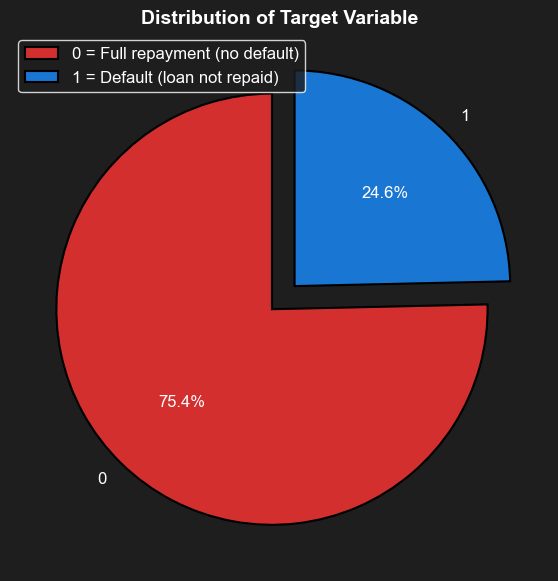

In [5]:
# Plot Status distribution
# Define a palette (Ask GPT for suggestions)
colors = ["#D32F2F", "#1976D2"]  # Darker red and blue
explode = (0.05, 0.1)  # Slightly separate the slices

# Create Pie Chart with 
fig, ax = plt.subplots(figsize=(7, 7), facecolor='#1E1E1E')  # Dark background
ax.set_facecolor('#1E1E1E')

data['Status'].value_counts().plot.pie(
    autopct="%1.1f%%",  # Display percentages with one decimal place
    startangle=90,  # Rotate pie chart to start at 90 degrees (top)
    colors=colors,  # Assign custom colors to slices
    explode=explode,  # Separate slices slightly for better visibility
    textprops={'fontsize': 12, 'color': 'white'},  # White text for contrast
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Add black edge for clarity and separation
    ax=ax  # Use the predefined axis for plotting
)

# Add legend
labels = ["0 = Full repayment (no default)", "1 = Default (loan not repaid)"]
plt.legend(labels, loc="best", fontsize=12, facecolor='#1E1E1E', edgecolor='white', labelcolor='white')

# Styling
plt.ylabel('')  # Remove Y-label
plt.title("Distribution of Target Variable", fontsize=14, color="white", fontweight="bold")  # Title Styling

# Display the plot
plt.show()


Since we don't really have a description of the dataset let's be positive and assume that the majority of bank's customers (75.4%) acctually returned the loan and hence the `0` would mean `Full Repayment` and `1` would mean `Default`. Let's add the legend to the graph to make it more clear. 

## Numeric Data Distribution

In [6]:
data.info()  # Check data types
data.describe()  # Summary stats for numerical features
data.describe(include='object')  # Summary stats for categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,...,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


In [7]:
# number of unique elemenets in ltv
print(data['term'].unique())

[360. 300. 180. 312. 144. 240. 348. 324. 120.  96. 192. 156. 228. 336.
 288. 108. 276.  nan 132. 216. 168. 204. 264. 252. 165. 280. 322.]


In [8]:
sns.set_style("darkgrid")  # Sleek dark background
sns.set_palette(sns.color_palette("Spectral"))  # Color palette

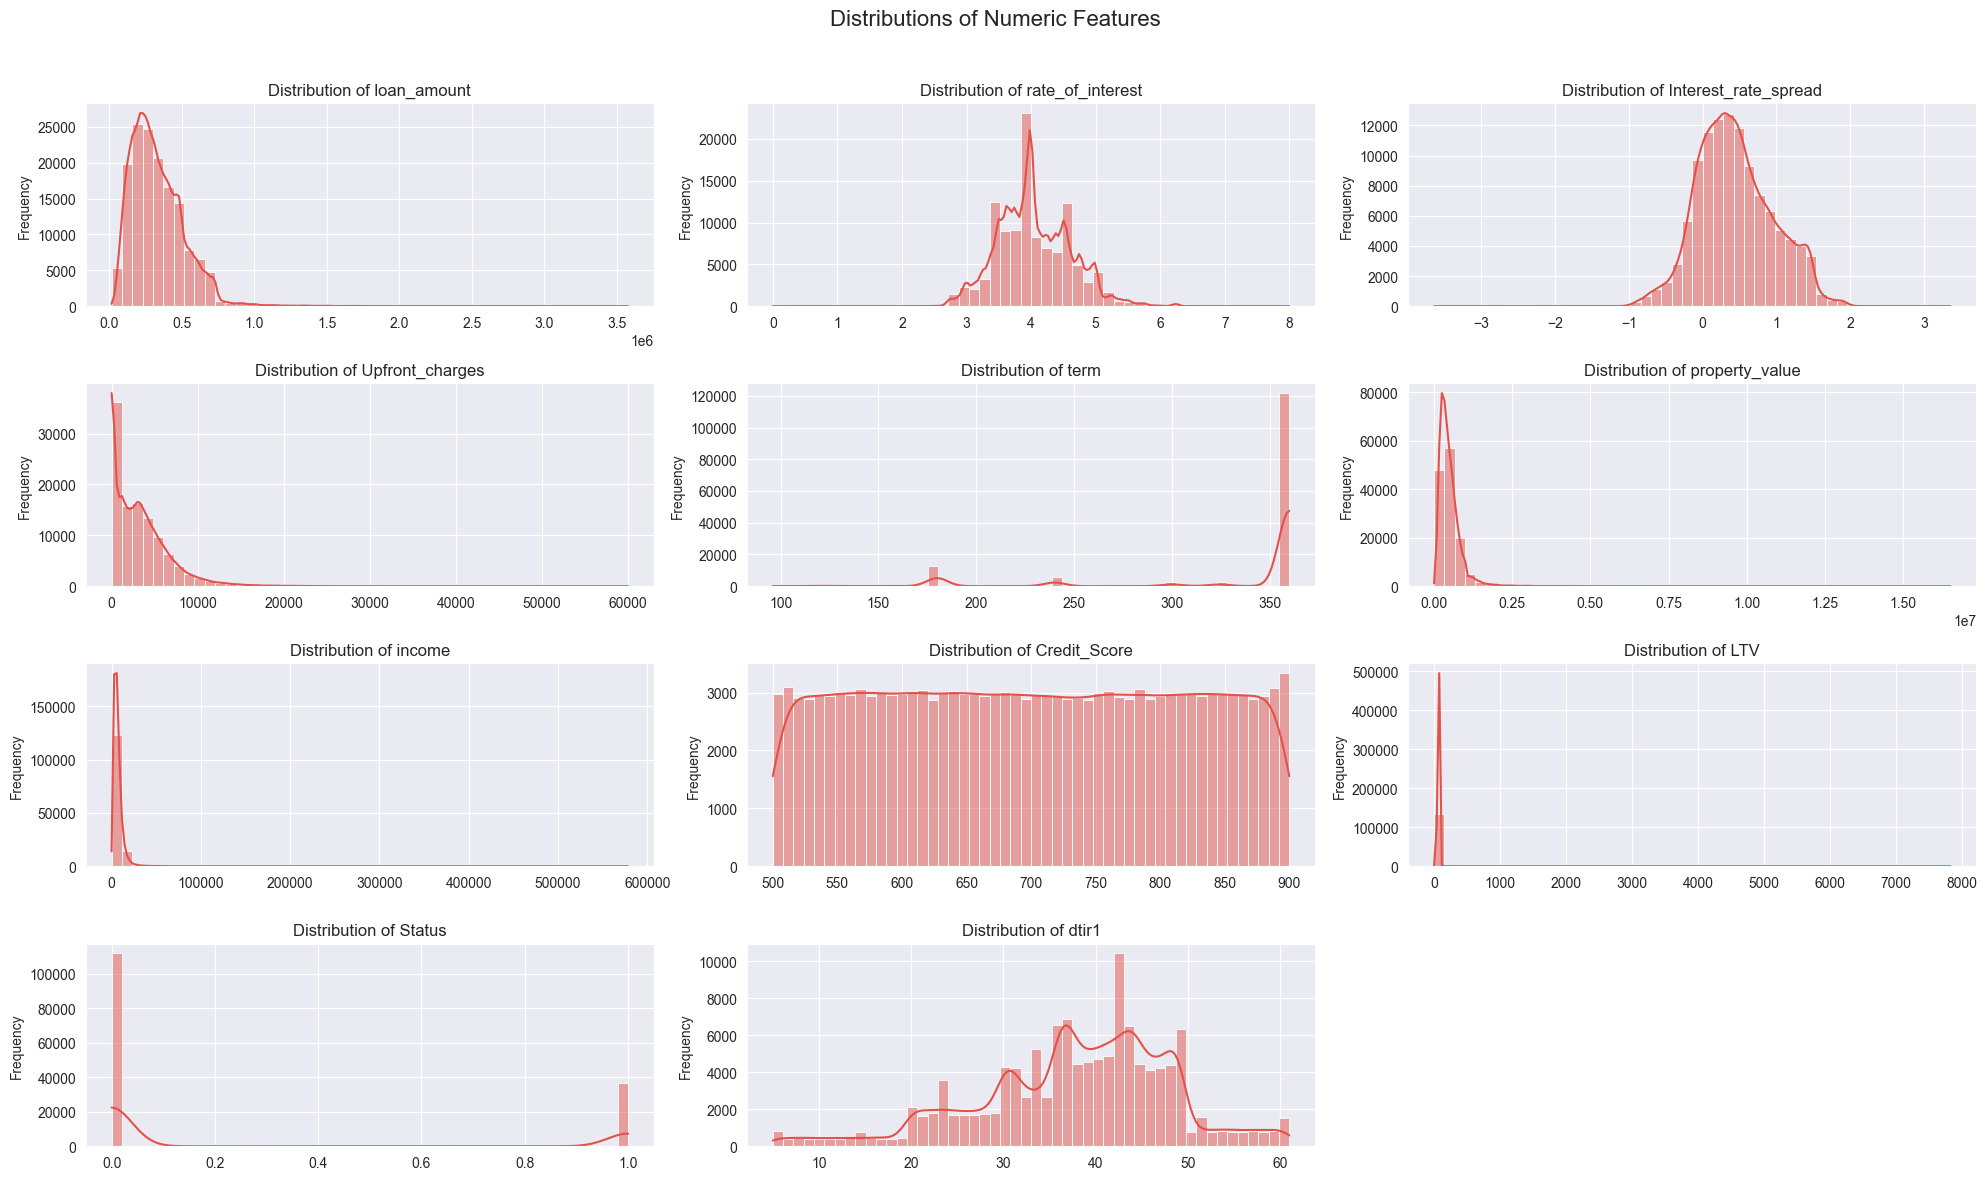

In [9]:
# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Determine the number of plots needed
num_features = numeric_data.shape[1]
num_cols = 3
num_rows = int(np.ceil(num_features / num_cols))  # Calculate required rows

# Create subplots dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 3 * num_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot histograms
for i, col in enumerate(numeric_data.columns):
    sns.histplot(numeric_data[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distributions of Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Some graphs follow certain distribution types for example: `loan amount`, `upfront charges` and ` property value` i am not sure what does it mean yet but we can dig deeper into the graphs the have certain correlation. 

Furthermore for some graphs histograms are not the best choice, `credit_score` would benefit from a different type of a plot. 

LTV and probably `term` has some super high outlier. we need to remove it. 

We also need to remove all the nan values.


These variables have right-skewed distributions, meaning they have long tails with extreme values:

- `loan_amount`
- `Upfront_charges`
- `income`
- `property_value`
- `LTV`


---


> Credit_Score

The distribution is almost uniform, meaning it doesn’t provide much variance.
Variance is important because... 

so lets convert credit score into categorical type and bin data into categories. 

There are a bunch of different categories in the interenet for Credit Score, however I tried most of them and found out that some categories were never used which lead to skewness, thefore I decided to just work with my own categories and hence solve this problem. If you are really interested i just poped all unique values of Credit Score into chatGPT and told him to create catgories out of it. 

In [10]:
# import pandas as pd

# # Define bins and labels
# bins = [500, 579, 639, 699, 749, 799, 900]
# labels = ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# # Apply binning
# data['Credit_Score_Category'] = pd.cut(data['Credit_Score'], bins=bins, labels=labels, include_lowest=True)

# # Convert to categorical type
# data['Credit_Score_Category'] = data['Credit_Score_Category'].astype('object')

# # Drop original column
# data.drop('Credit_Score', axis=1, inplace=True)

# # Verify the distribution
# print(data['Credit_Score_Category'].value_counts())


---
# OUTLIERS -> notebook

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample


In [2]:
# Load processed data
data = pd.read_csv('../data/processed/Loan_Default_Cleaned.csv')

Status
0    0.755075
1    0.244925
Name: proportion, dtype: float64


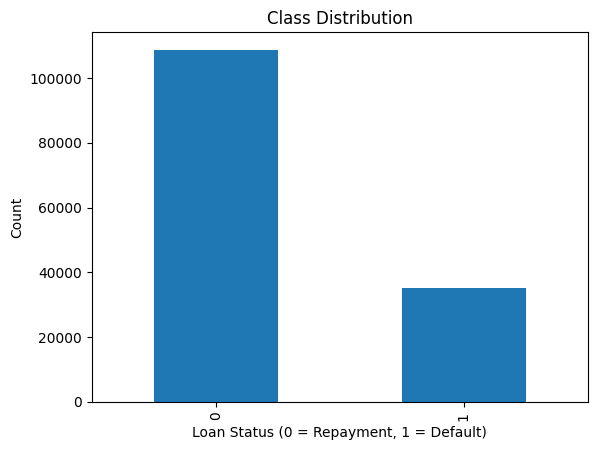

In [3]:
print(data['Status'].value_counts(normalize=True))  # Check proportions

data['Status'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Loan Status (0 = Repayment, 1 = Default)")
plt.ylabel("Count")
plt.show()

In [4]:
df_majority = data[data['Status'] == 0]
df_minority = data[data['Status'] == 1]

# Downsample majority
df_majority_down = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Upsample minority
df_minority_up = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Choose either approach (downsampling or upsampling)
data_balanced = pd.concat([df_majority_down, df_minority])
# data_balanced = pd.concat([df_majority, df_minority_up])

print(data_balanced['Status'].value_counts())  # Should now be balanced

Status
0    35255
1    35255
Name: count, dtype: int64


One class is more dominant than another which will overfit? the data.

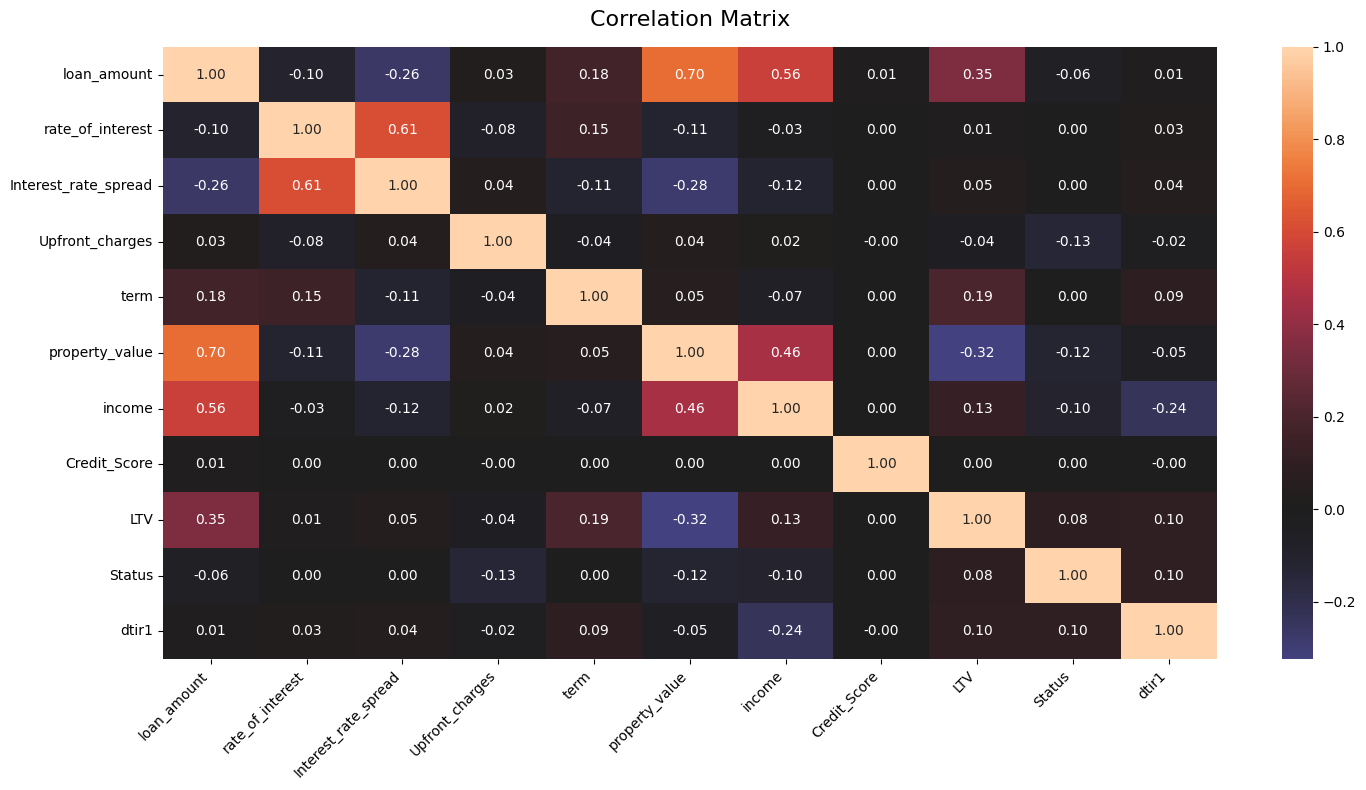

In [5]:
numeric_data = data_balanced.select_dtypes(include = ['float64', 'int64'])
numeric_data.corr()

# Correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f",  center=0)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) 
plt.title('Correlation Matrix', fontsize=16, pad=15) 
plt.tight_layout()  
plt.show()


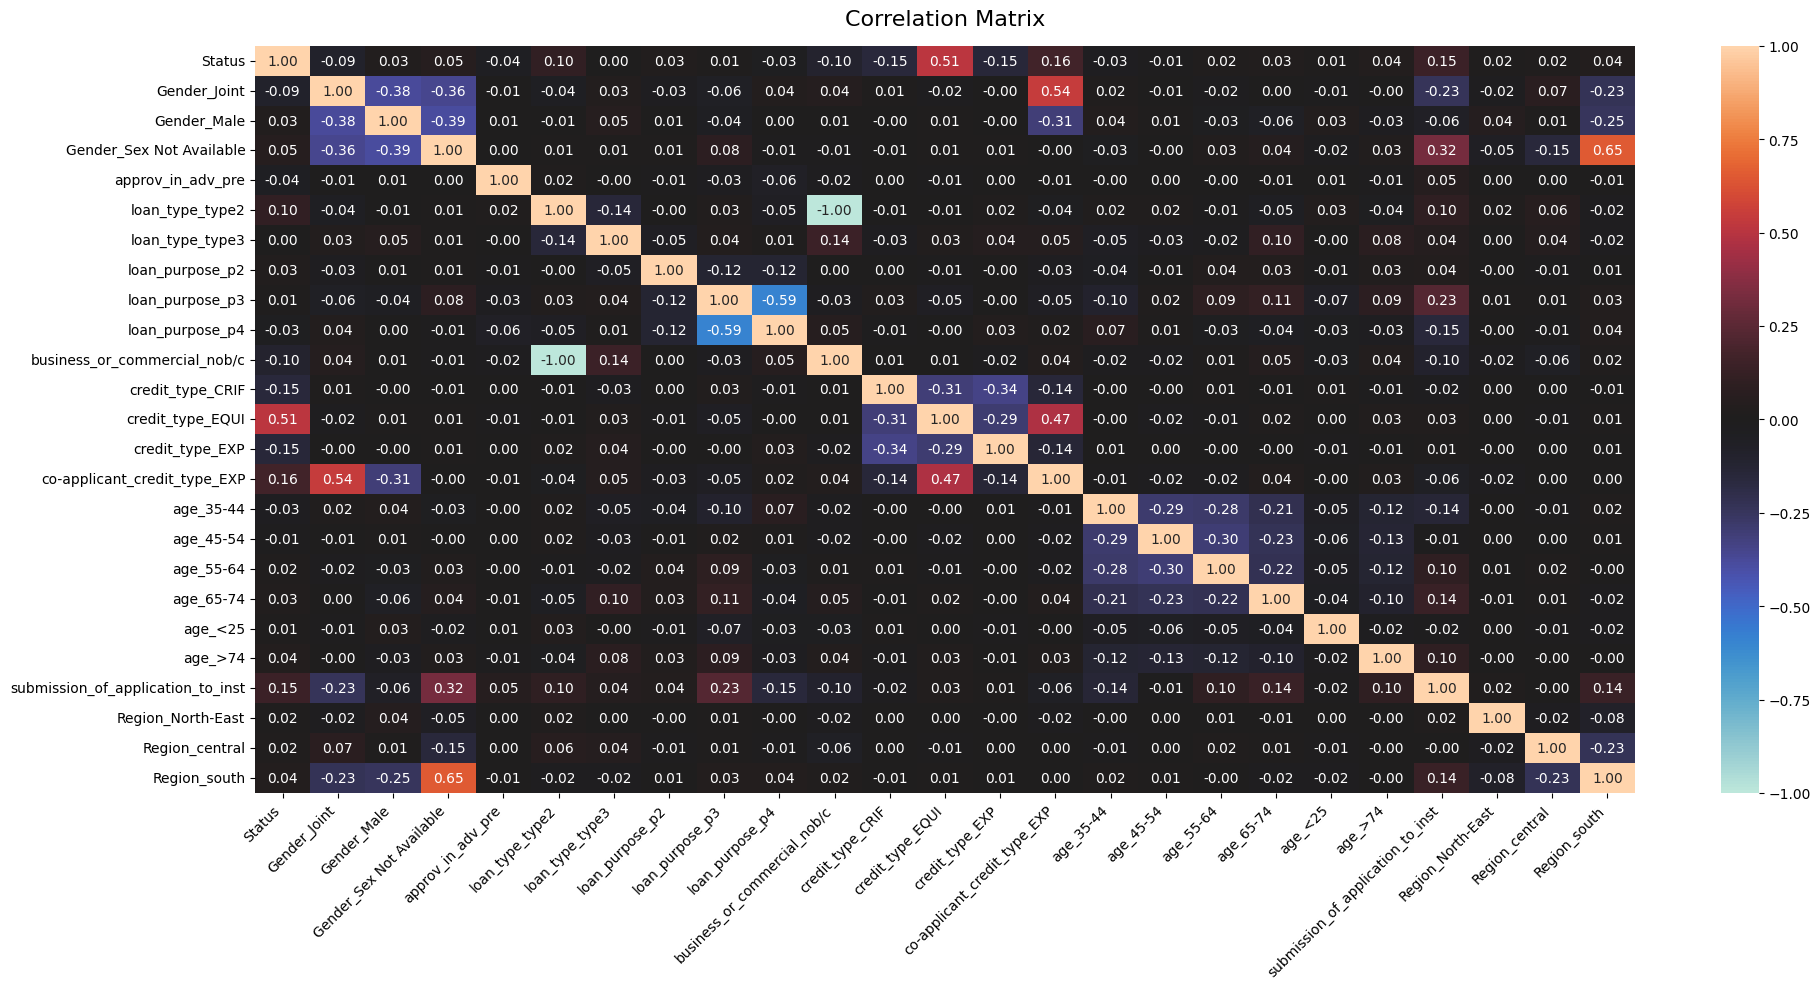

In [6]:
# Make Status type bool for the correlation matrix
data_balanced['Status'] = data_balanced['Status'].astype('bool')

categorical_data = data_balanced.select_dtypes(include = 'bool')
categorical_data.corr()

# Correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(categorical_data.corr(), annot=True, fmt=".2f",  center=0)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) 
plt.title('Correlation Matrix', fontsize=16, pad=15) 
plt.tight_layout()  
plt.show()

data['Status'] = data['Status'].astype('int')



###  Remove These Features (Low Correlation & Redundant)
These features show **low correlation (|r| < 0.05) with both `Status` and `loan_amount`**, meaning they are unlikely to contribute meaningfully to the model:

1. **`credit_score`** → Correlation with `Status` = **0.00** (completely useless in this case).
2. **`income`** → Correlation with `Status` = **-0.09** (very weak; might be a bad predictor).
3. **`business_or_commercial_nob/c`** → No meaningful impact on default rates.
4. **`submission_of_application_to_inst`** → Weak correlation, unlikely to help predict default.
5. **`Gender_Joint` & `Gender_Male`** → No real impact on whether someone defaults (gender doesn’t drive financial risk).
6. **`Region_south` & `Region_central`** → Loan default risk isn’t really affected by region unless backed by evidence.
7. **`property_value`** → Highly correlated with `loan_amount` (**r = 0.73**), meaning we can just keep `loan_amount`.

---

### Consider Removing These (Weak Contribution)
These have **weak to moderate correlation** but might still hold value in some cases:

1. **`term`** → Small effect, might help if loans with longer terms have different risk.
2. **`dtir1`** → Debt-to-income ratio might have **non-linear effects**, so test before removing.
3. **`Interest_rate_spread`** → Correlated with `rate_of_interest` (**r = 0.61**), but might be useful.
4. **`loan_purpose_p2, loan_purpose_p3, loan_purpose_p4`** → If loan purpose doesn’t strongly impact default, remove.

---
### ** Why This Works**
- **We keep important financial predictors** (loan amount, interest rate, LTV).
- **We remove weakly relevant demographic/region variables** that don’t drive loan default risk.
- **We simplify the model**, improving interpretability & training efficiency.

Would you like me to implement this in your code? 🚀

In [7]:
# Calculate correlation matrix for categorical data
corr_matrix = data_balanced.corr()

# Select features with |r| < 0.1 to Status
low_corr_features = corr_matrix['Status'][corr_matrix['Status'].abs() < 0.1].index.tolist()

print("Features with |r| < 0.1 to Status:", low_corr_features)
print("Number of features with |r| < 0.1 to Status:", len(low_corr_features))

Features with |r| < 0.1 to Status: ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'term', 'Credit_Score', 'LTV', 'dtir1', 'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available', 'approv_in_adv_pre', 'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'age_<25', 'age_>74', 'Region_North-East', 'Region_central', 'Region_south']
Number of features with |r| < 0.1 to Status: 24


In [8]:
drop_cols = [
    'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available',
    'Region_North-East', 'Region_central', 'Region_south',
    'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'age_<25', 'age_>74',
    'business_or_commercial_nob/c', 'approv_in_adv_pre',
    'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
    'loan_type_type2', 'loan_type_type3', 'Credit_Score'
]

data_filtered = data_balanced.drop(columns=drop_cols, axis=1)
print("Dropped columns:", drop_cols)


Dropped columns: ['Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available', 'Region_North-East', 'Region_central', 'Region_south', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'age_<25', 'age_>74', 'business_or_commercial_nob/c', 'approv_in_adv_pre', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4', 'loan_type_type2', 'loan_type_type3', 'Credit_Score']


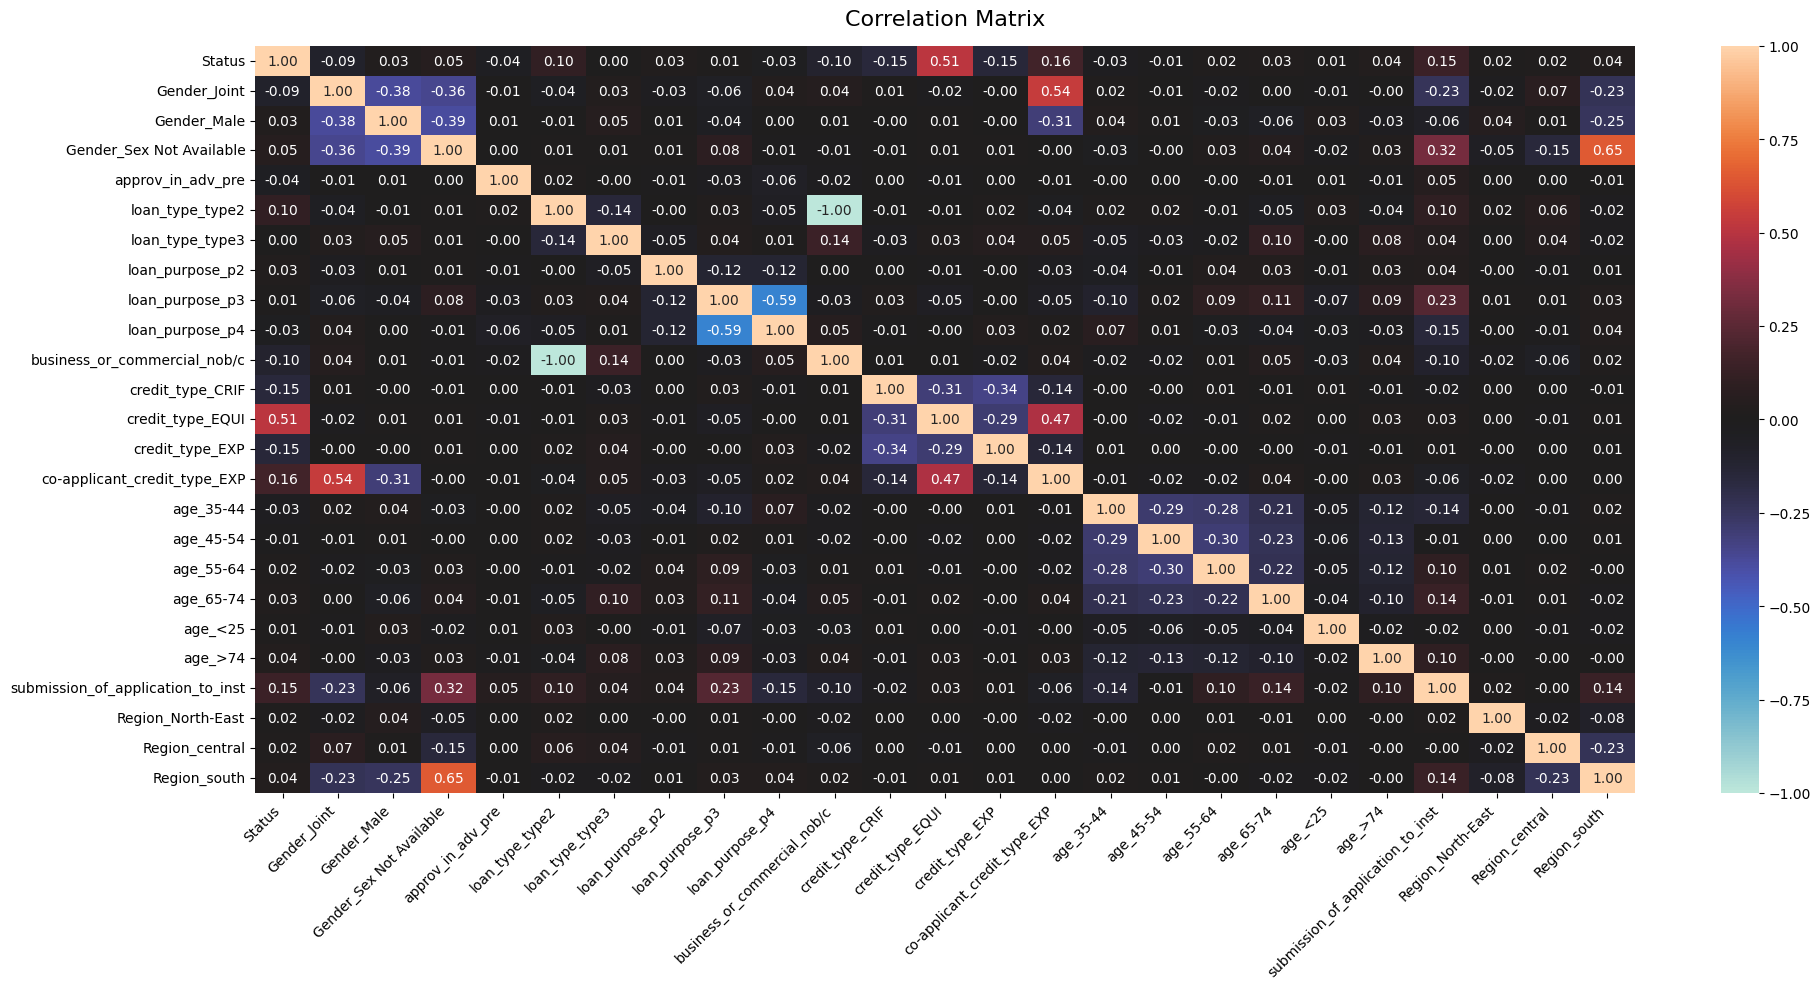

In [11]:
data_filtered.corr()

# Correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(categorical_data.corr(), annot=True, fmt=".2f",  center=0)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) 
plt.title('Correlation Matrix', fontsize=16, pad=15) 
plt.tight_layout()  
plt.show()



In [12]:
# Save the cleaned data
data_filtered.to_csv('../data/processed/Loan_Default_Cleaned_No_Noice.csv', index=False)